# Home Credit Default Risk

문제 : 고객의 상환 능력을 예측하여 대출 원리금, 만기, 상환 날짜를 부여하기

평가 : Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.
제출은 예측값과 관측값 사이의 ROC 곡선 아래의 영역으로 평가합니다.

## ROC curve

https://losskatsu.github.io/machine-learning/stat-roc-curve/#1-roc-%EC%BB%A4%EB%B8%8C%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C%EC%9A%94

### 머신러닝 모델을 평가할 때 쓰이는 판정법

### 민감도와 특이도

예시) 의사의 진단. 의사는 환자를 진단해 병에 걸렸느냐 안걸렸느냐를 진단할 수 있음 이 때 발생할 수 있는 경우의 수는

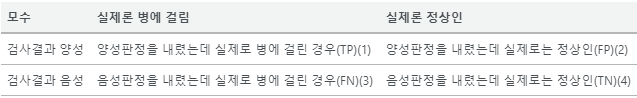

이를 간단히 하면

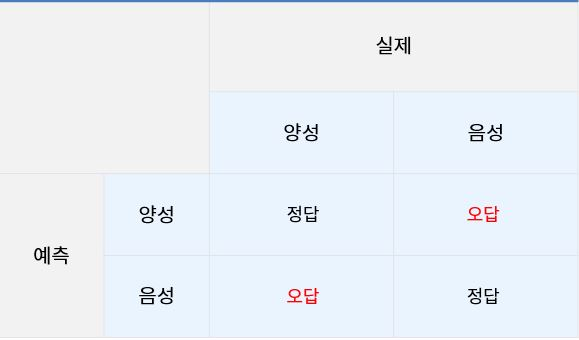

위 그림처럼 오답과 정답으로 나눌 수 있고 자세히 보면 다음과 같습니다.

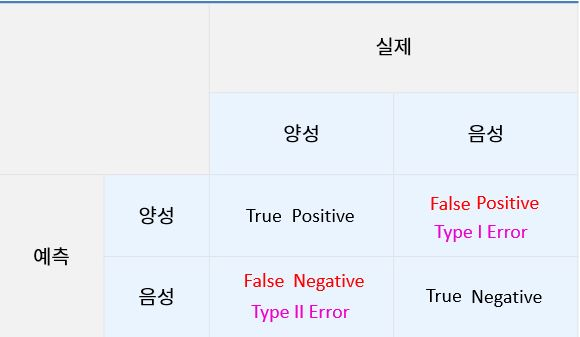


- 민감도(Sensitivity, True positive rate(TPR), Recall) : 실제 병이 걸린 사람이 양성(positive) 판정을 받는 비율
- 특이도(Specificity, True Negative rate(TNR) ) : 정상인이 음성(Negative) 판정을 받는 비율

- False positive rate(FPR) : 1-특이도

- 정확도(Accuracy) : 전체 데이터 중 제대로 분류된 데이터 비율

- 에러율(Error rate) : 전체 데이터 중 제대로 분류되지 않은 데이터 비율

- 정밀도(Precision) : positive로 예측했을 때, 실제로 Positive인 비율[](http://)



수식은 다음과 같습니다. ((1) : TP, (2) : FP, (3) : FN, (4) : TN)

민감도 : (1) / (1)+(3)

특이도 : (4) / (2)+(4)

False positive rate : (2) / (2)+(4)

정확도 : (1)+(4) / (1)+(2)+(3)+(4)

에러율 : (2)+(3) / (1)+(2)+(3)+(4)

정밀도 : (1) / (1)+(2)

### ROC 커브

모형이 좋다 -> 병이 걸린 사람에게 양성 판정을 내리고, 정상인에게 음성 판정을 내리는 것
모든 진단에 대해 양성 판정을 내리면? 병에 걸린 모든 환자를 찾을 수 있지만, 정상인도 환자로 판정받음
모든 진단에 대해 음성 판정을 내리면? 정상인에 대해 올바른 판정이 내려지지만, 환자를 잘못 판단함

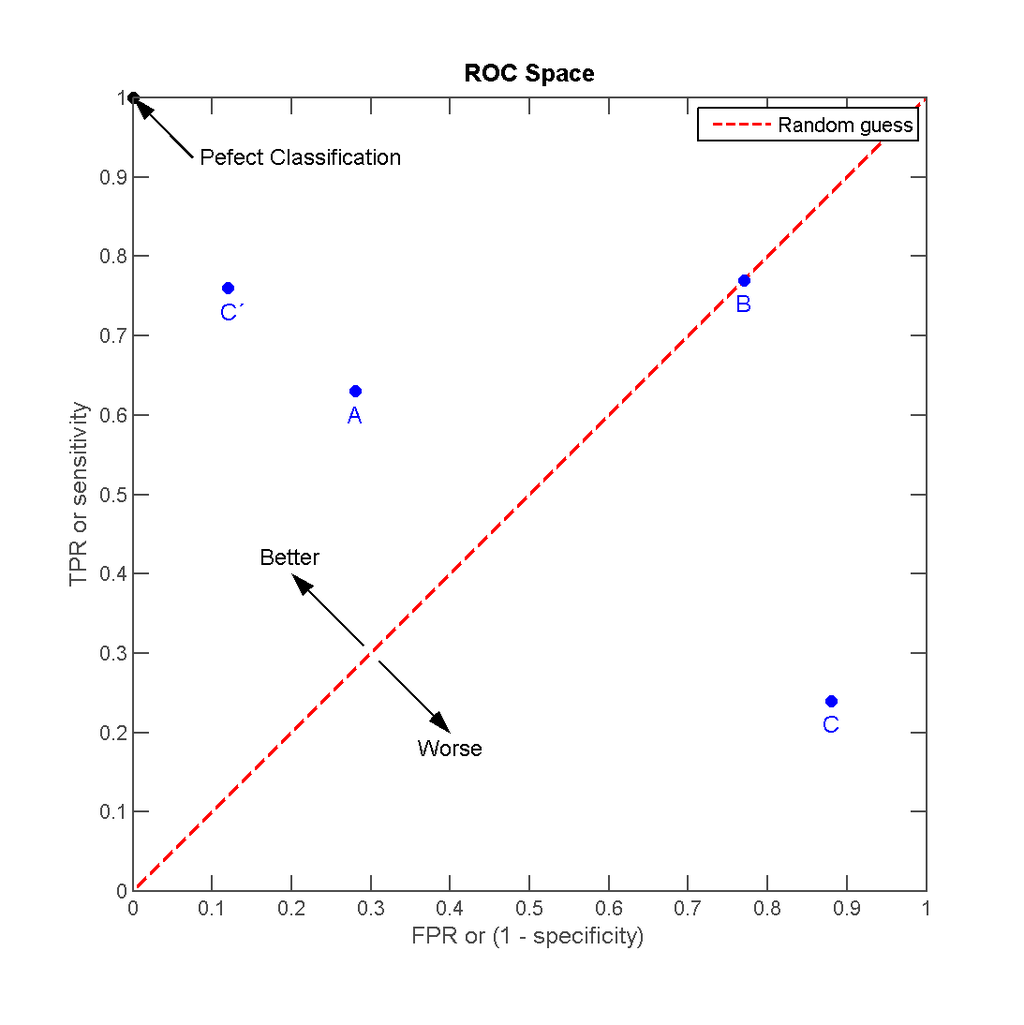

ROC 커브는 이런 다양한 부분을 한눈에 보여주는 판정법.
가장 이상적인 경우 : TPR = 1 (민감도) , FPR = 0 (특이도) 인 경우(Perfect classification)

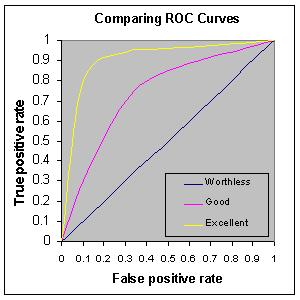

ROC 커브에서 모델의 평가가 좋다는 것은 커브의 밑면적(AUC) 의 넓이가 넓을수록 성능이 좋다는 것입니다.

-> 데이터를 TP,TN,FP,FN 으로 분류하는 작업 필요

## Data Description

- application_{train|test}.csv
This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Target이 포함된 훈련 데이터와 Target이 없는 시험 데이터로 나뉨.

Static data for all applications. One row represents one loan in our data sample.
정적 데이터임, 1 row 는 1개의 대출을 나타냄

- breau.csv
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
모든 고객의 신용조사기관에 기록된 금융권에서의 신용기록

For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
sample에 있는 모든 기록에 대해, 신청일 전에 신용국에 고객이 가지고 있던 신용기록 수 만큼 행이 있다.


- breau_balance.csv
Monthly balances of previous credits in Credit Bureau.
이전 신용의 월별 잔액?

This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
이 표에는 이전 신용기록의 번호에 대한 행이 있다.


- POS_CASH_balance.csv
Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
mohthly balance 스냅샷

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
여기에는 1행당 각 달의 이전 신용기록이 있다?(소비 및 현금대출) 

- credit_card_balance.csv
Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
이전 신용카드의 monthly balance snapshots

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

- previous_application.csv
All previous applications for Home Credit loans of clients who have loans in our sample.

There is one row for each previous application related to loans in our data sample.

- installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

There is a) one row for every payment that was made plus b) one row each for missed payment.

One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

- HomeCredit_columns_description.csv

This file contains descriptions for the columns in the various data files.

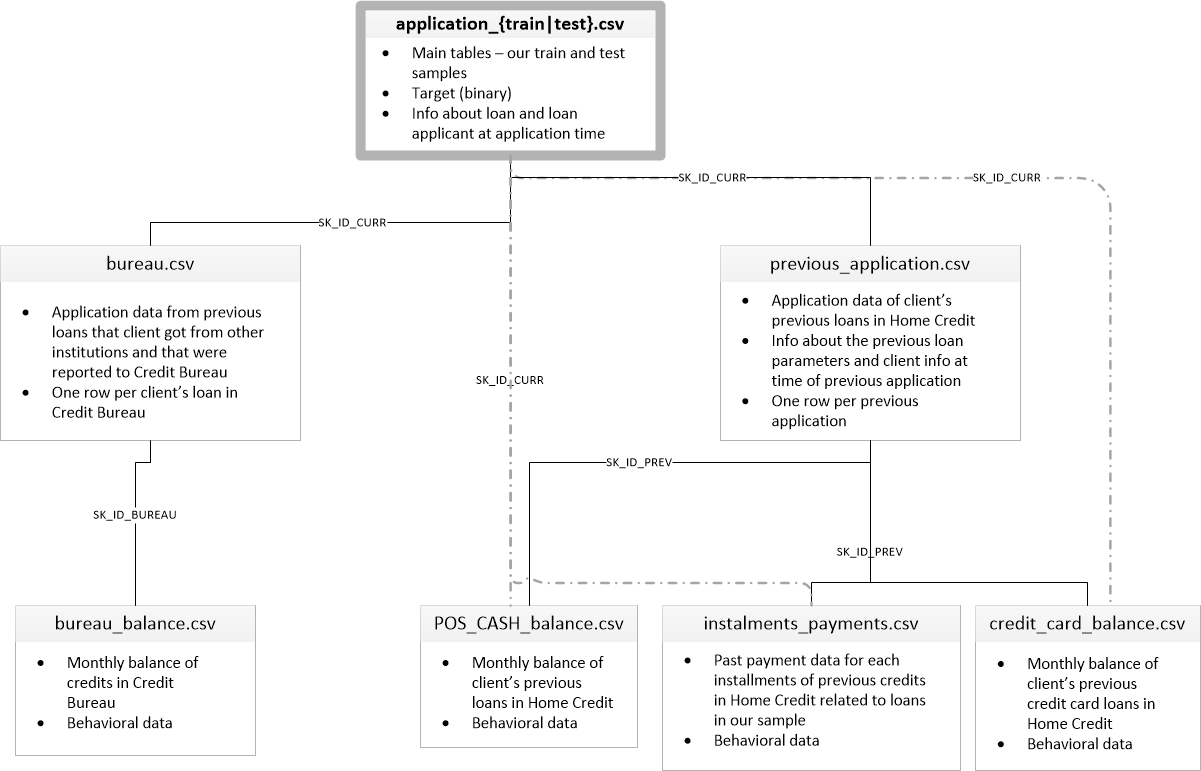

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
print(os.listdir("../input/home-credit-default-risk"))

['sample_submission.csv', 'bureau_balance.csv', 'POS_CASH_balance.csv', 'application_train.csv', 'HomeCredit_columns_description.csv', 'application_test.csv', 'previous_application.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'bureau.csv']


In [3]:
data_dir= '../input/home-credit-default-risk'
train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')

In [4]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(train.shape)

(307511, 122)


In [6]:
test = pd.read_csv(data_dir+'/application_test.csv')

In [7]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(test.shape)

(48744, 121)


## EDA

In [9]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

0이 대출가능, 1이 대출하기 어려움

0과 1의 차이가 큼 -> imbalanced class problem 으로

In [10]:
def missing_values_table(df):
    # 총 결측치의 수
    mis_val = df.isnull().sum()
    
    # 결측치 percent
    mis_val_percent = 100*df.isnull().sum() / len(df)
    
    # 결측치, 퍼센트로 dataframe 생성
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis=1)
    
    # column rename 
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # 퍼센트 기준 내림차순으로 정렬 , ren_columns에서 2열의 모든 값 중에 0이 아닌 것들을 %를 기준으로 정렬
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending = False).round(1)
    
    # 요약정보 print
    
    print('선택된 데이터의 열 수 : ' + str(df.shape[1]) + '\n'
         '이 중에 결측치가 있는 열의 수 : ' + str(mis_val_table_ren_columns.shape[0]))
    
    # ren_columns(dataframe) 를 return해줌
    return mis_val_table_ren_columns

In [11]:
missing_values = missing_values_table(train)
missing_values.head(20)

선택된 데이터의 열 수 : 122
이 중에 결측치가 있는 열의 수 : 67


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


위와 같은 결측치를 어떻게 할 것인가?

- 결측치 대체 
- 결측치가 높은 column 을 drop
- XGBoost와 같이 결측치를 대체할 필요 없는 모델 사용

### Column Types

숫자형 변수와 str타입의 범주형 변수 구분

In [12]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

#train.select_dtype('object') : 타입이 object인 데이터들의 dataframe 호출
#.apply(pd.Series.nunique, axis= 0) : dataframe에서 유일한 값 세기

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding Categorical Variables

- label encoding

- one-hot encoding

In [14]:
# label encoder object
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

# Iterate throgh the columns
for col in train:
    if train[col].dtype == 'object':
        if len(list(train[col].unique())) <= 2:
            # Train
            le.fit(train[col])
            
            # Transform train, test data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            # keep track of how many columns were label encoded
            
            le_count += 1
            
print('%d 개의 열이 라벨화 되었습니다.' % le_count)
            

3 개의 열이 라벨화 되었습니다.


In [15]:
# one-hot encoding of categorical variables
# 데이터를 기계가 인식할 수 있도록 수로 전처리해주는 과정

train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
train.head()

(307511, 243)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_labels = train['TARGET']

train, test = train.align(test, join = 'inner', axis= 1)

train['TARGET'] = train_labels

print(train.shape)
print(test.shape)

(307511, 240)
(48744, 239)


In [17]:
print(test.shape)
test.head()

(48744, 239)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# descirbe() 를 활용하여 통계적 지표를 확인해보자

In [19]:
(train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [20]:
# 괜찮은 것 같다. 이상치가 없음

In [21]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [22]:
# 최대값이 365243이다 (약1000년임) 말이 안된다.

Text(0.5, 0, 'DAYS EMPLOYMENT')

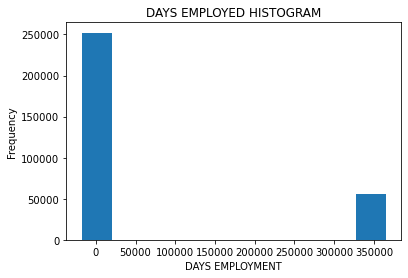

In [23]:
train['DAYS_EMPLOYED'].plot.hist(title = 'DAYS EMPLOYED HISTOGRAM');
plt.xlabel('DAYS EMPLOYMENT')

In [24]:
# 비정상적인 데이터를 따로 뽑아서 채무불이행율이 차이가 나나 확인해보자

In [25]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] !=365243]
print('정상 데이터의 채무율 평균')
print(100*non_anom['TARGET'].mean(),'%')
print('비정상 데이터의 채무율 평균')
print(100*anom['TARGET'].mean(),'%')


정상 데이터의 채무율 평균
8.65997453765215 %
비정상 데이터의 채무율 평균
5.399646043269405 %


In [26]:
# 이상치를 다음과 같이 처리한다 : 결측값으로 설정한 뒤 imputation을 이용, 이 경우에는 모든 이상치가
# 동일한 값을 가진다. 이상치를 수가 아닌 np.nan으로 처리해 새로운 boolean 열을 만들어 이상치를 나타내준다.

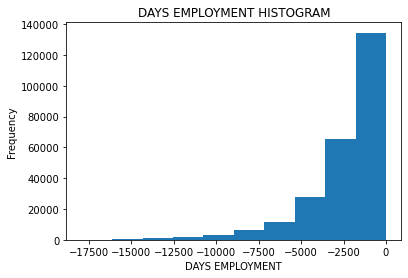

In [27]:
# 이상치 여부를 알려주는 열을 만든다.
train['DAYS_EMPLOYED_ANOM'] =train['DAYS_EMPLOYED'] ==365243

# 이상치값을 nan으로 채운다
train['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)

train['DAYS_EMPLOYED'].plot.hist(title = 'DAYS EMPLOYMENT HISTOGRAM');
plt.xlabel('DAYS EMPLOYMENT');

In [28]:
test['DAYS_EMPLOYED_ANOM'] = test['DAYS_EMPLOYED'] == 365243
test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace = True)

print('이상치의 수  %d , 전체 데이터  %d' % (test['DAYS_EMPLOYED_ANOM'].sum(), len(test)))

이상치의 수  9274 , 전체 데이터  48744


### Correlations

특성과 target값 사이의 상관관계 확인  dataframe 의 .corr 를 사용

상관관계의 정도
- .00~.19 : 아주 약함
- .20~.39 : 약함
- .40~.59 : 보통
- .60~.79 : 강함
- .80~1.0 : 매우 강함

In [29]:
correlations = train.corr()['TARGET'].sort_values()

print('양의 상관관계')
print(correlations.tail(15))
print('음의 상관관계')
print(correlations.head(15))

양의 상관관계
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
음의 상관관계
EXT_SOURCE_3             

In [30]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07823930831003195

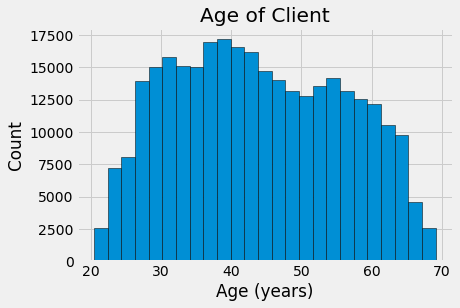

In [31]:
plt.style.use('fivethirtyeight')

plt.hist(train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

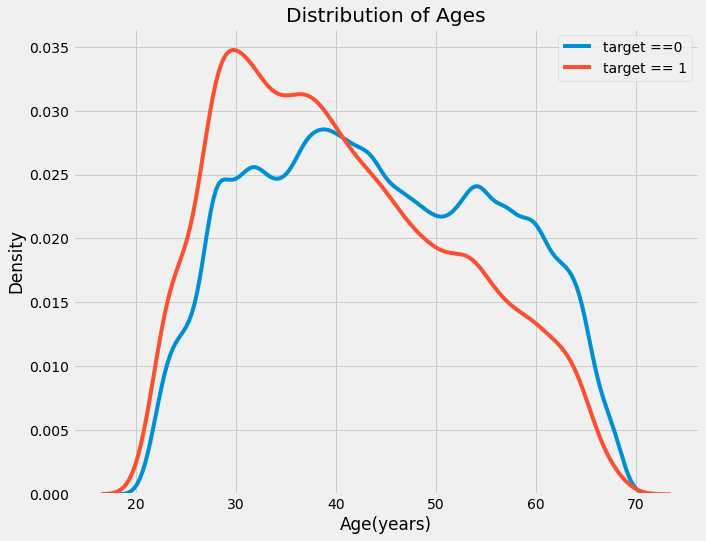

In [32]:
import seaborn as sns

plt.figure(figsize=(10,8))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label= 'target ==0')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.legend()

plt.xlabel('Age(years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [33]:
age_data = train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] =pd.cut(age_data['YEARS_BIRTH'], bins= np.linspace(20, 70, num=11))
age_data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [34]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


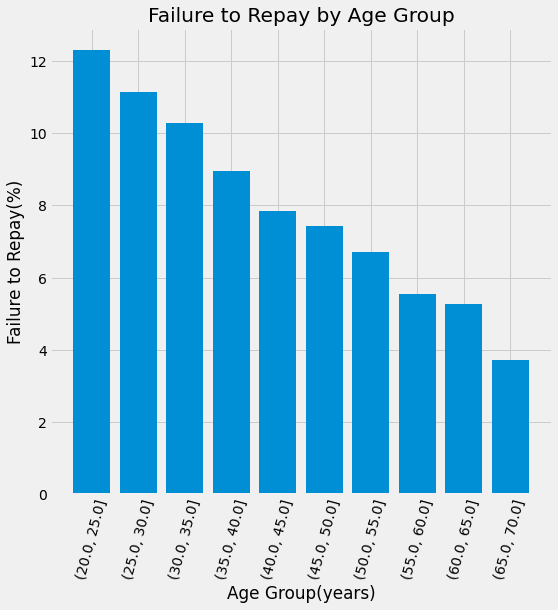

In [35]:
plt.figure(figsize = (8,8))

plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

plt.xticks(rotation = 75); plt.xlabel('Age Group(years)'); plt.ylabel('Failure to Repay(%)')
plt.title('Failure to Repay by Age Group');

In [37]:
ext_data = train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


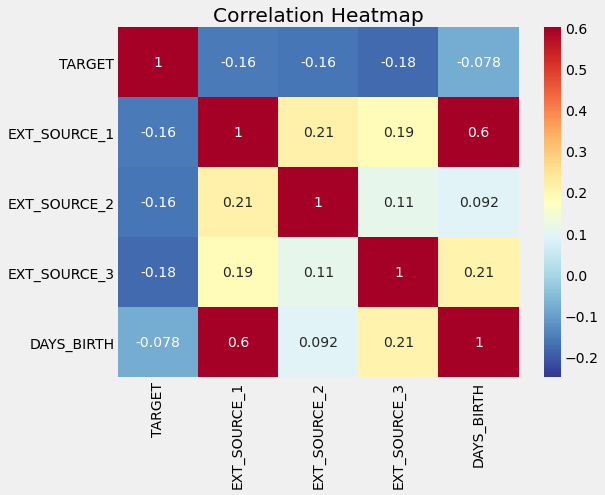

In [38]:
plt.figure(figsize = (8,6))

sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [ ]:
# 3개의 EXT_SOURCE 가 모두 TARGET값과 음의 상관관계를 갖는다. EXT_SOURCE의 값이 클수록 상환할 가능성이 높다.
# DAYS_BIRTH가 EXT_SOURCE_1 과 양의 상관관계를 갖는다. 나이를 나타내는 요소같다.

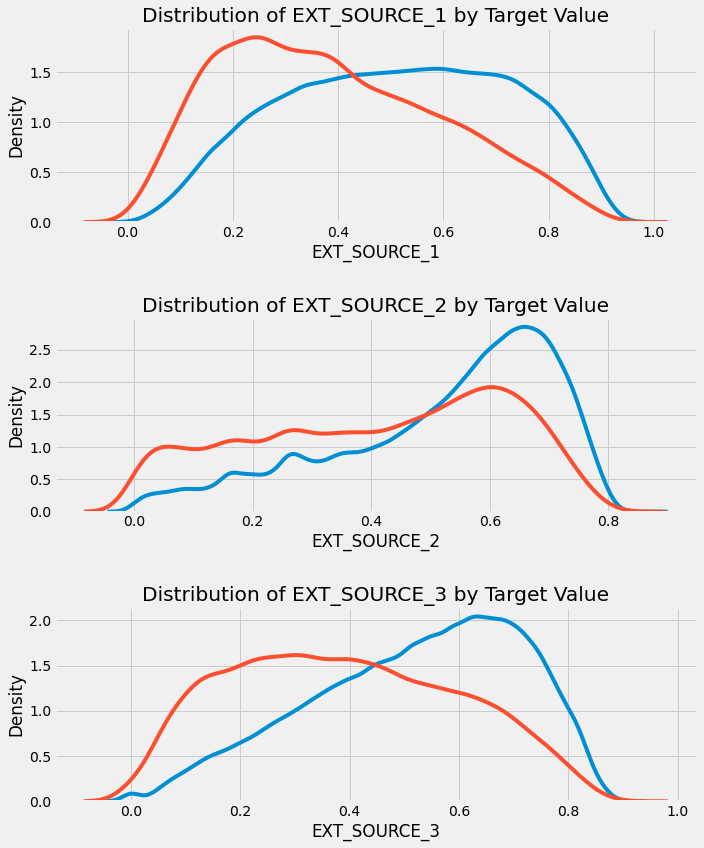

In [39]:
plt.figure(figsize = (10,12))

for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    
    plt.subplot(3, 1 , i+1)
    
    sns.kdeplot(train.loc[train['TARGET'] ==0 ,source], label = 'target ==1')
    
    sns.kdeplot(train.loc[train['TARGET'] ==1, source], label = 'target==1')
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### Feature Engineering

- 개념 : Feature Engineering은 머신러닝 알고리즘을 작동하기 위해 데이터에 대한 도메인 지식(전문화된 학문이나 분야의 지식)을 활용하여 Feature를 만들어내는 과정. 머신러닝 모델을 위한 데이터 테이블의 column을 생성하거나 선택하는 작업으로 모델 성능에 미치는 영향이 크기 때문에 머신러닝 응용에 있어서 굉장히 중요한 단계이며, 전문성과 시간과 비용이 많이 드는 작업임.

- Feature가 중요한 이유 : 머신러닝의 성능은 입력 데이터에 의존적임. 어떤 feature가 유용한지 아닌지를 확인하는 과정을 거치는데 이러한 과정을 특징선택(feature selection) 또는 특징 추출(feature extraction)이라고 함.

- 차원 감소(Dimension Reduction) 란? : 모든 feature의 부분집합을 선택하거나, 불필요한 feature를 제거하여 간결한 feature 집합을 만드는 것에 목적이 있음. 작성자의 배경 지식을 통해 진행할 수도 있지만, 자동특징선택을 사용할 수 있음. 이는 feature 중에 몇 개를 없애보고 개선된다면 성능을 확인해보는 방법으로 대부분의 특징 선택 알고리즘의 기본 동작방식임.

(출처 : http://www.incodom.kr/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5/feature_engineering)

- 요약 : 머신러닝 모델의 성능을 올리기 위해 해당 데이터의 중요한 변수들을 찾아 다듬고 , 새로운 변수를 만드는 것.



In [40]:
poly_features = train[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test = test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
# 중간값으로 impute

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree =3)

In [41]:
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('다항식 feature의 크기 : ', poly_features.shape)

다항식 feature의 크기 :  (307511, 35)


In [42]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])[::]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [43]:
poly_features = pd.DataFrame(poly_features,
                            columns = poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1',
                                                                                           'EXT_SOURCE_2',
                                                                                           'EXT_SOURCE_3',
                                                                                           'DAYS_BIRTH']))

poly_features['TARGET'] = poly_target

poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


In [44]:
poly_features_test = pd.DataFrame(poly_features_test,
                                 columns = poly_transformer.get_feature_names(['EXT_SOURCE_1',
                                                                              'EXT_SOURCE_2',
                                                                              'EXT_SOURCE_3',
                                                                              'DAYS_BIRTH']))

poly_features['SK_ID_CURR'] = train['SK_ID_CURR']
train_poly = train.merge(poly_features, on = 'SK_ID_CURR',how = 'left')

poly_features_test['SK_ID_CURR'] = train['SK_ID_CURR']
test_poly = test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

train_poly, test_poly = train_poly.align(test_poly, join = 'inner', axis = 1)

print('다항식 feature가 포함된 훈련 데이터의 크기 : ',train_poly.shape)
print('다항식 feature가 포함된 시험 데이터의 크기 : ',test_poly.shape)


다항식 feature가 포함된 훈련 데이터의 크기 :  (307511, 275)
다항식 feature가 포함된 시험 데이터의 크기 :  (48744, 275)


### Domain Knowledge Features

'Domain knowledge'를 쓸 만큼 credit 전문가는 아니지만 얕은 지식을 활용해볼까?

CREDIT_INCOME_PERCENT : 고객의 수입에 대한 CREDIT의 %

ANNUITY_INCOME_PERCENT : 고객의 수입에 대한 연금의 %

CREDIT_TERM : 지급 기간?

DAYS_EMPLOYED_PERCENT : 고객 나이에 대한 고용일(?)의 비율

In [45]:
train_domain = train.copy()
test_domain = test.copy()

train_domain['CREDIT_INCOME_PERCENT'] = train_domain['AMT_CREDIT'] / train_domain['AMT_INCOME_TOTAL']
train_domain['ANNUITY_INCOME_PERCENT'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_INCOME_TOTAL']
train_domain['CREDIT_TERM'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_CREDIT']
train_domain['DAYS_EMPLOYED_PERCENT'] = train_domain['DAYS_EMPLOYED'] / train_domain['DAYS_BIRTH']

In [46]:
test_domain['CREDIT_INCOME_PERCENT'] = test_domain['AMT_CREDIT'] / test_domain['AMT_INCOME_TOTAL']
test_domain['ANNUITY_INCOME_PERCENT'] = test_domain['AMT_ANNUITY'] / test_domain['AMT_INCOME_TOTAL']
test_domain['CREDIT_TERM'] = test_domain['AMT_ANNUITY'] / test_domain['AMT_CREDIT']
test_domain['DAYS_EMPLOYED_PERCENT'] = test_domain['DAYS_EMPLOYED'] / test_domain['DAYS_BIRTH']

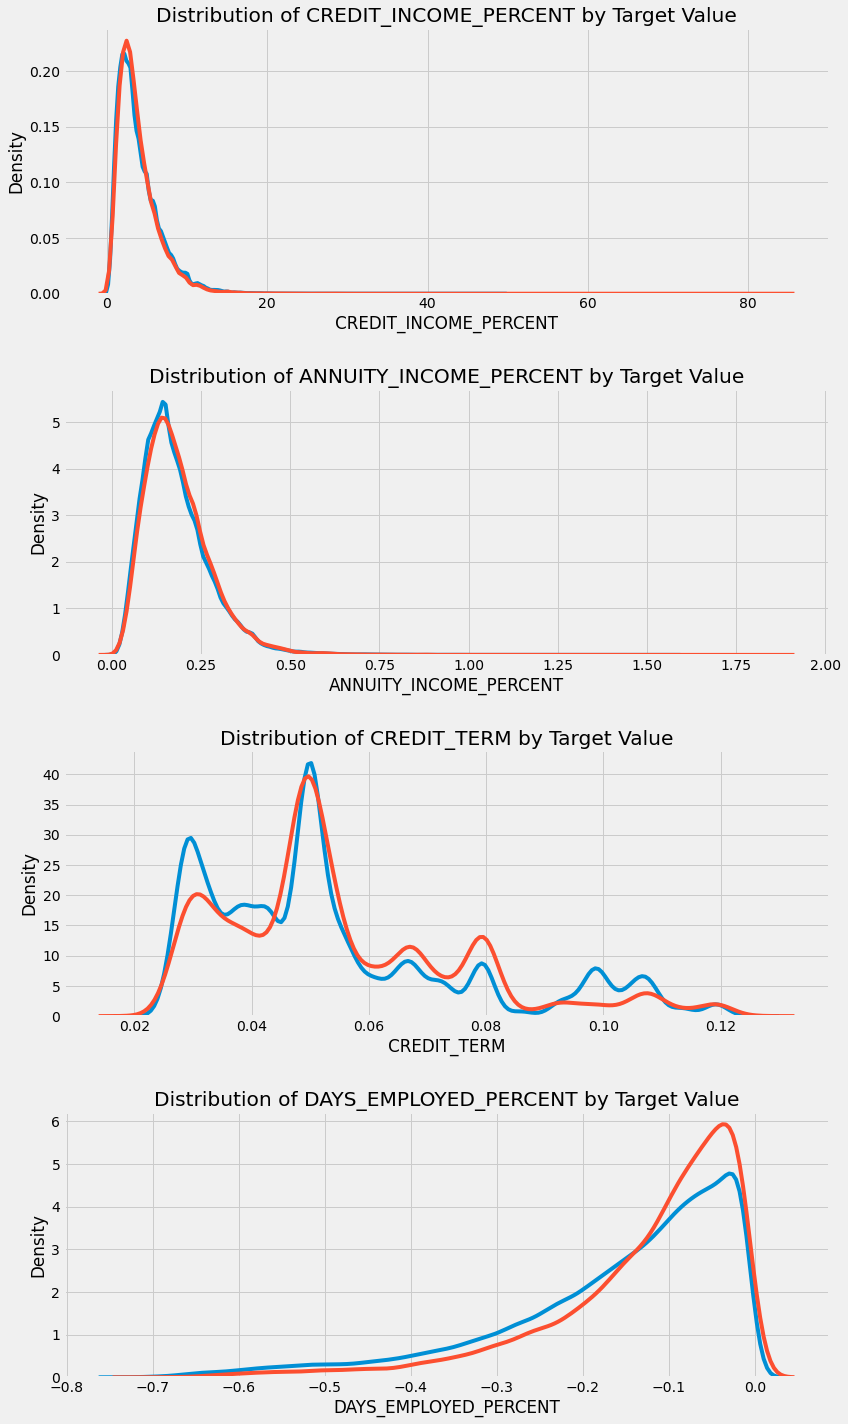

In [47]:
plt.figure(figsize = (12,20))

for i,feature in enumerate(['CREDIT_INCOME_PERCENT',
                            'ANNUITY_INCOME_PERCENT',
                            'CREDIT_TERM',
                            'DAYS_EMPLOYED_PERCENT']):
    
    plt.subplot(4, 1 , i+1)
    
    sns.kdeplot(train_domain.loc[train_domain['TARGET'] ==0, feature], label='target == 0')
    
    sns.kdeplot(train_domain.loc[train_domain['TARGET'] == 1, feature], label ='target == 1')
    
    plt.title('Distribution of %s by Target Value' %feature)
    plt.xlabel('%s' %feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

    

이게 도움이 될지 안 될진 몰라도 일단 해보자

In [48]:
def plot_feature_importances(df):

    df = df.sort_values('importance', ascending = False).reset_index()
    
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
 
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [49]:
feature_importances_sorted = plot_feature_importances(feature_importances)

NameError: name 'feature_importances' is not defined

In [ ]:
feature_importances_domain_sorted = plot_feature_importance(feature_importances_domain)


### LightGBM

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    labels = features['TARGET']
    
    features = features.drop(columns = ['SK_ID_CURR','TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        features, test_features = features.align(test_features, join = 'inner',axis =1)
        
        cat_indices = 'auto'
        
        
    elif encoding == 'le':
        label_encoder = LabelEncoder()
        cat_indices = []
        
        for i,col in enumerate(features):
            if features[col].dtype == 'object':
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))
                cat_indices.append(i)
                
        else:
            raise ValueError("Encoding must be either 'ohe' or 'le'")
        print('훈련 데이터 크기 : ',features.shape)
        print('시험 데이터 크기 : ',test_features.shape)
        
        features.names = list(features.columns)
        
        features = np.array(features)
        test_features = np.array(test_features)
        
        k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
        
        feature_importance_values = np.zeros(len(feature_names))
        
        test_predictions = np.zeros(test_features.shape[0])
        
        out_of_fold = np.zeros(features.shape[0])
        
        valid_scores = []
        train_scores = []
        
        for train_indices, valid_indices in k_fold.split(features):
            train_features, train_labels = features[train_indices], labels[train_indices]
            valid_features, valid_labels = features[valid_indices], labels[valid_indices]
            
            model = lgb.LGBMClassifier(n_estimators = 10000, objective = 'binary',
                                      class_weight = 'balanced', learning_rate = 0.05,
                                      re_alpha = 0.1, reg_lambda = 0.1,
                                      subsample = 0.8, n_jobs = -1, random_state = 50)
            model.fit(train_features,train_labels,eval_metric = 'auc',
                     eval_set = [(valid_features, valid_labels),(train_features,train_labels)],
                     eval_names = ['valid','train'], categorical_feature = cat_indices,
                     early_stopping_rounds = 100, verbose = 200)
            best_iteration = model.best_itertaion_
            
            feature_importance_values += model.feature_importances_ / k_fold.n_splits
            
            test_predictions += model.predict_proba(test_features,num_iteration =best_iteration)[:,1] / k_fold.n_splits
            
            out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:,-1]
            
            valid_score = model.best_score_['valid']['auc']
            train_score = model.best_score_['train']['auc']
            
            valid_scores.append(valid_score)
            train_scores.append(train_score)
            
            gc.enable()
            del model, train_features, valid_features
            gc.collect()
            
        submission = pd.DataFream({'SK_ID_CURR' : test_ids , 'TARGET' : test_predictions})
        
        feature_importances = pd.DataFrame({'feature':feature_names,'importance':feature_importance_values})
        
        valid_auc = roc_auc_score(labels, out_of_fold)
        
        valid_scores.append(valid_auc)
        train_scores.append(np.mean(train_scores))
        
        fold_names = list(range(n_folds))
        fold_names.append('overall')
        
        metrics = pd.DataFrame({'fold':fold_names,
                               'train':train_scores,
                               'valid':valid_scores})
        
        return submission,feature_importances, metrics

In [75]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']

    labels = features['TARGET']

    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)

        features, test_features = features.align(test_features, join = 'inner', axis = 1)

        cat_indices = 'auto'

    elif encoding == 'le':

        label_encoder = LabelEncoder()

        cat_indices = []

        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                cat_indices.append(i)
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)

    feature_names = list(features.columns)

    features = np.array(features)
    test_features = np.array(test_features)

    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)

    feature_importance_values = np.zeros(len(feature_names))

    test_predictions = np.zeros(test_features.shape[0])

    out_of_fold = np.zeros(features.shape[0])

    valid_scores = []
    train_scores = []

    for train_indices, valid_indices in k_fold.split(features):

        train_features, train_labels = features[train_indices], labels[train_indices]
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)

        best_iteration = model.best_iteration_

        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits

        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]

        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)

        gc.enable()
        del model, train_features, valid_features
        gc.collect()

    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    valid_auc = roc_auc_score(labels, out_of_fold)

    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    fold_names = list(range(n_folds))
    fold_names.append('overall')

    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [63]:
import matplotlib.pyplot as plt

In [64]:
train_domain

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,1,0,1,0,1,False,2.007889,0.121978,0.060749,-0.067329
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,1,0,0,False,4.790750,0.132217,0.027598,-0.070862
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,False,2.000000,0.100000,0.050000,-0.011814
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,False,2.316167,0.219900,0.094941,-0.159905
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,False,4.222222,0.179963,0.042623,-0.152418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,1,0,1,0,0,False,1.617143,0.174971,0.108198,-0.025303
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,1,0,1,0,0,True,3.743750,0.166687,0.044524,NaN
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0,0,1,0,0,False,4.429176,0.195941,0.044239,-0.529266
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,1,0,1,0,1,False,2.164368,0.118158,0.054592,-0.400134


In [65]:
test_domain

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,1,0,1,0,False,4.213333,0.152300,0.036147,0.121044
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,False,2.250182,0.175455,0.077973,0.247398
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,False,3.275378,0.344578,0.105202,0.222477
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,1,0,0,1,0,False,5.000000,0.155614,0.031123,0.133515
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,False,3.475000,0.178150,0.051266,0.168021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,0,0,0,0,0,False,3.395556,0.143815,0.042354,0.258838
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,0,0,0,0,0,False,3.951829,0.202600,0.051267,0.102718
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,0,1,0,1,0,False,1.555556,0.163978,0.105414,0.190742
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,1,0,0,1,0,False,2.000000,0.111680,0.055840,0.195518


### 중요한 특성 몇개만 골라서 해보자

In [66]:
important_features = ['SK_ID_CURR','TARGET','CREDIT_TERM','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','AMT_GOODS_PRICE','DAYS_EMPLOYED_PERCENT',
                      'DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT','OWN_CAR_AGE','ANNUITY_INCOME_PERCENT']

In [67]:
train_important = train_domain[important_features]

In [68]:
important_features_test = ['SK_ID_CURR','CREDIT_TERM','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','AMT_GOODS_PRICE','DAYS_EMPLOYED_PERCENT',
                      'DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT','OWN_CAR_AGE','ANNUITY_INCOME_PERCENT']

In [69]:
test_important = test_domain[important_features_test]

In [71]:
train_important

,SK_ID_CURR,TARGET,CREDIT_TERM,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,AMT_GOODS_PRICE,DAYS_EMPLOYED_PERCENT,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,OWN_CAR_AGE,ANNUITY_INCOME_PERCENT
0,100002,1,0.060749,0.083037,0.262949,0.139376,9461,-637.0,-2120,351000.0,-0.067329,-3648.0,-1134.0,406597.5,NaN,0.121978
1,100003,0,0.027598,0.311267,0.622246,NaN,16765,-1188.0,-291,1129500.0,-0.070862,-1186.0,-828.0,1293502.5,NaN,0.132217
2,100004,0,0.050000,NaN,0.555912,0.729567,19046,-225.0,-2531,135000.0,-0.011814,-4260.0,-815.0,135000.0,26.0,0.100000
3,100006,0,0.094941,NaN,0.650442,NaN,19005,-3039.0,-2437,297000.0,-0.159905,-9833.0,-617.0,312682.5,NaN,0.219900
4,100007,0,0.042623,NaN,0.322738,NaN,19932,-3038.0,-3458,513000.0,-0.152418,-4311.0,-1106.0,513000.0,NaN,0.179963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.108198,0.145570,0.681632,NaN,9327,-236.0,-1982,225000.0,-0.025303,-8456.0,-273.0,254700.0,NaN,0.174971
307507,456252,0,0.044524,NaN,0.115992,NaN,20775,NaN,-4090,225000.0,NaN,-4388.0,0.0,269550.0,NaN,0.166687
307508,456253,0,0.044239,0.744026,0.535722,0.218859,14966,-7921.0,-5150,585000.0,-0.529266,-6737.0,-1909.0,677664.0,NaN,0.195941
307509,456254,1,0.054592,NaN,0.514163,0.661024,11961,-4786.0,-931,319500.0,-0.400134,-2562.0,-322.0,370107.0,NaN,0.118158


In [72]:
test_important

,SK_ID_CURR,CREDIT_TERM,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,AMT_GOODS_PRICE,DAYS_EMPLOYED_PERCENT,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,OWN_CAR_AGE,ANNUITY_INCOME_PERCENT
0,100001,0.036147,0.752614,0.789654,0.159520,-19241,-2329.0,-812,450000.0,0.121044,-5170.0,-1740.0,568800.0,NaN,0.152300
1,100005,0.077973,0.564990,0.291656,0.432962,-18064,-4469.0,-1623,180000.0,0.247398,-9118.0,0.0,222768.0,NaN,0.175455
2,100013,0.105202,NaN,0.699787,0.610991,-20038,-4458.0,-3503,630000.0,0.222477,-2175.0,-856.0,663264.0,5.0,0.344578
3,100028,0.031123,0.525734,0.509677,0.612704,-13976,-1866.0,-4208,1575000.0,0.133515,-2000.0,-1805.0,1575000.0,NaN,0.155614
4,100038,0.051266,0.202145,0.425687,NaN,-13040,-2191.0,-4262,625500.0,0.168021,-4000.0,-821.0,625500.0,16.0,0.178150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0.042354,NaN,0.648575,0.643026,-19970,-5169.0,-3399,270000.0,0.258838,-9094.0,-684.0,412560.0,NaN,0.143815
48740,456222,0.051267,NaN,0.684596,NaN,-11186,-1149.0,-3003,495000.0,0.102718,-3015.0,0.0,622413.0,NaN,0.202600
48741,456223,0.105414,0.733503,0.632770,0.283712,-15922,-3037.0,-1504,315000.0,0.190742,-2681.0,-838.0,315000.0,4.0,0.163978
48742,456224,0.055840,0.373090,0.445701,0.595456,-13968,-2731.0,-1364,450000.0,0.195518,-1461.0,-2308.0,450000.0,NaN,0.111680


In [ ]:
train_domain['TARGET'] = train_labels

submission_domain, fi_domain, metrics_domain = model(train_domain, test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

submission_domain.to_csv('baseline_lgb_domain_2.csv', index = False)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804779	train's binary_logloss: 0.541283	valid's auc: 0.762511	valid's binary_logloss: 0.557227
Early stopping, best iteration is:
[268]	train's auc: 0.815523	train's binary_logloss: 0.530413	valid's auc: 0.763069	valid's binary_logloss: 0.550276
Training until validation scores don't improve for 100 rounds


In [ ]:
submission_domain

In [ ]:
submission_domain.to_csv('baseline_lgb_important.csv', index = False)

중요한 특성만 15개 골라서 제출한 점수 : 0.747
그대로 했을 때 : 0.754

In [ ]:
important_features = ['SK_ID_CURR','TARGET','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH',
                     'DAYS_REGISTRATION','CREDIT_TERM','ANNUITY_INCOME_PERCENT','CREDIT_INCOME_PERCENT',
                     'DAYS_EMPLOYED','AMT_ANNUITY','DAYS_EMPLOYED_PERCENT','DAYS_LAST_PHONE_CHANGE',
                     'AMT_CREDIT','EXT_SOURCE_1']

train_important = train_domain[important_features]

important_features_test = ['SK_ID_CURR','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH',
                     'DAYS_REGISTRATION','CREDIT_TERM','ANNUITY_INCOME_PERCENT','CREDIT_INCOME_PERCENT',
                     'DAYS_EMPLOYED','AMT_ANNUITY','DAYS_EMPLOYED_PERCENT','DAYS_LAST_PHONE_CHANGE',
                     'AMT_CREDIT','EXT_SOURCE_1']

test_important = test_domain[important_features_test]

In [ ]:
train_domain['TARGET'] = train_labels

submission_domain, fi_domain, metrics_domain = model(train_important, test_important)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)
submission_domain.to_csv('baseline_lgb_important.csv', index = False)
